# Mushrooms Machine Learning Model
Readers note: This is notebook is meant for a talk where I'm demonstrating what NOT to do. Do treat this notebook as a valid pattern to copy.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
columns = ["poisonous", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
          "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type",
          "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]

In [8]:
df = pd.read_csv("../data/agaricus-lepiota.data", names = columns)

In [9]:
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
df.shape

(8124, 23)

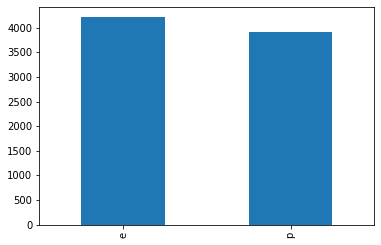

In [11]:
df["poisonous"].value_counts().plot(kind="bar")

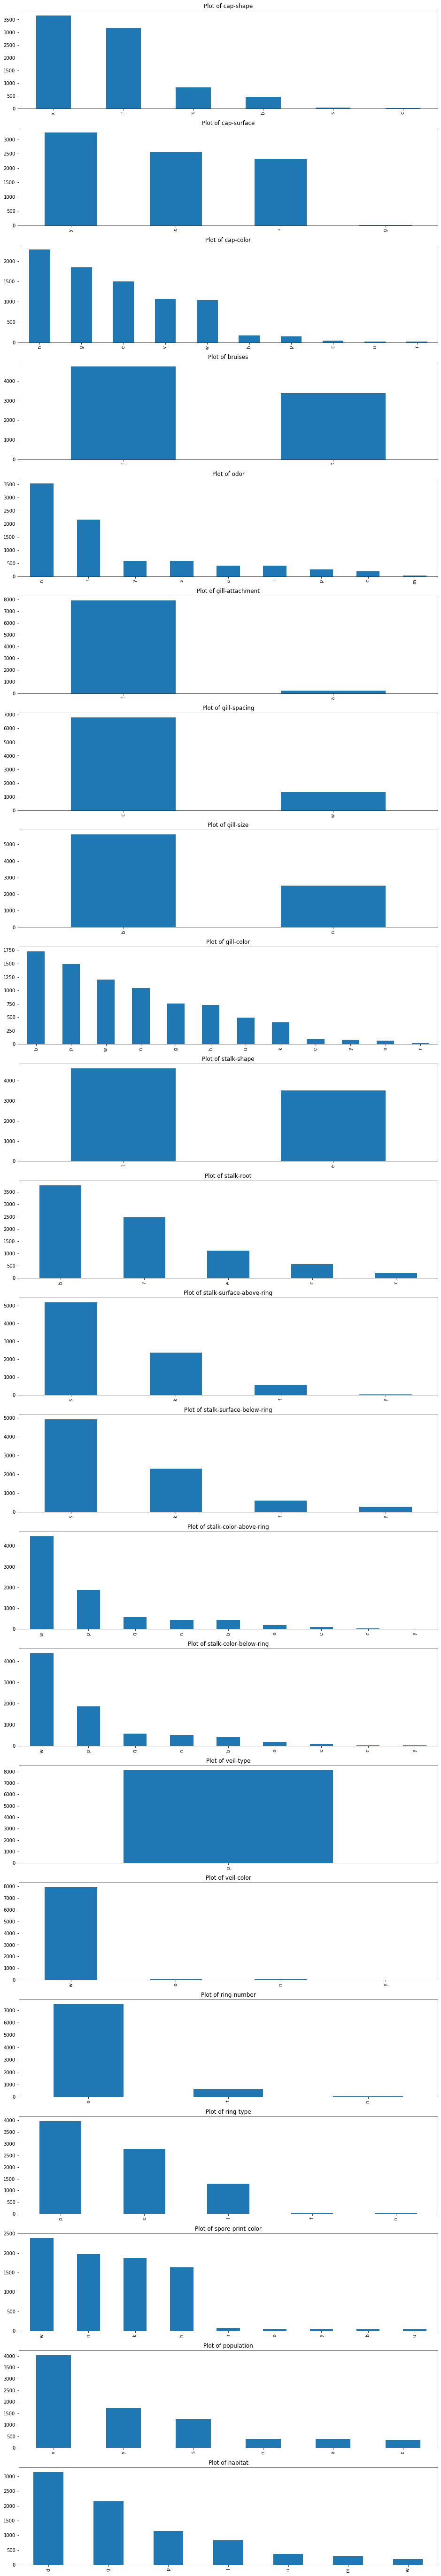

In [17]:
fig, axes = plt.subplots(len(columns) -1, 1, figsize = (16, 100))

for ax, feature in zip(axes, columns[1:]):
    df[feature].value_counts().plot(kind="bar", ax=ax)
    ax.set_title(f"Plot of {feature}")

In [18]:
from sklearn import model_selection

In [77]:
x = df.drop("poisonous", axis=1)
Y = df["poisonous"]

In [78]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, Y, test_size=0.30)

In [79]:
from sklearn import ensemble
from sklearn import preprocessing

In [80]:
one_hot = preprocessing.OneHotEncoder()
rf = ensemble.RandomForestClassifier(n_estimators=2, max_depth=1)

x_one_hot = one_hot.fit_transform(X_train)
rf.fit(x_one_hot, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=1, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
preds = rf.predict(one_hot.transform(X_test))

In [82]:
from sklearn import metrics

In [85]:
metrics.accuracy_score(y_test, preds)

0.8474159146841673